In [1]:
print("hello world")

hello world


In [2]:
import numpy as np
import json

datafile = './work/housing.data'
data = np.fromfile(datafile, sep=' ')
data

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

In [3]:
feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])

x = data[0]
print(x.shape)
print(x)

(14,)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


In [4]:
ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]
training_data.shape

(404, 14)

In [5]:
test_data =  training_data.max(axis=0)
# training_data
test_data

array([ 88.9762, 100.    ,  25.65  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 666.    ,  22.    , 396.9   ,
        37.97  ,  50.    ])

In [6]:
maximums, minimums = training_data.max(axis=0), training_data.min(axis=0)

for i in range(feature_num):
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

In [7]:
def load_data():
    datafile = './work/housing.data'
    data = np.fromfile(datafile,sep=' ')

    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)
    # print(feature_num)
    # data = data.reshape([data.shape[0] // feature_num, feature_num])
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    maximums, minimums = training_data.max(axis=0), training_data.min(axis=0)

    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
    
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

# def load_data():

#     # 从文件导入数据
#     datafile = './work/housing.data'
#     data = np.fromfile(datafile, sep=' ')

#     # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
#     feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
#                       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
#     feature_num = len(feature_names)
#     print(feature_num)
#     # 将原始数据进行Reshape，变成[N, 14]这样的形状
#     data = data.reshape([data.shape[0] // feature_num, feature_num])

#     # 将原数据集拆分成训练集和测试集
#     # 这里使用80%的数据做训练，20%的数据做测试
#     # 测试集和训练集必须是没有交集的
#     ratio = 0.8
#     offset = int(data.shape[0] * ratio)
#     training_data = data[:offset]

#     # 计算训练集的最大值，最小值
#     maximums, minimums = training_data.max(axis=0), \
#                             training_data.min(axis=0)

#     # 对数据进行归一化处理
#     for i in range(feature_num):
#         data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

#     # 训练集和测试集的划分比例
#     training_data = data[:offset]
#     test_data = data[offset:]
#     return training_data, test_data

In [8]:
training_data, test_data = load_data()
x = training_data[:, :-1]
y = training_data[:, -1:]

In [9]:
print(x[0])
print()
print(y[0])

[0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991]

[0.42222222]


In [10]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, -0.1, -0.2, -0.3, -0.4, 0.0]
w = np.array(w).reshape([13,1])

In [11]:
x1 = x[0]
t = np.dot(x1, w)
print(t)

[0.69474855]


In [12]:
b = -0.2
z = t + b
print(z)

[0.49474855]


In [13]:
class Network(object):
    def __init__(self, num_of_weights):
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    

In [14]:
net = Network(13)
x1 = x[0]
y1 = y[0]
z = net.forward(x1)
print(z)

[2.39362982]


In [15]:
Loss = (y1 - z) * (y1 -z)
print(Loss)

[3.88644793]


In [16]:
class Network(object):
    def __init__(self, num_of_weights):
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z -y
        cost = error * error
        cost = np.mean(cost)
        return cost

In [17]:
net = Network(13)

x1 = x[0:3]
y1 = y[0:3]
z = net.forward(x1)
print('predict: ', z)
loss = net.loss(z, y1)
print('loss: ', loss)

predict:  [[2.39362982]
 [2.46752393]
 [2.02483479]]
loss:  3.384496992612791


In [18]:
x1 = x[0]
y1 = y[0]
z1 = net.forward(x1)
print('x1 {}, shape {}'.format(x1, x1.shape))
print('y1 {}, shape {}'.format(y1, y1.shape))
print('z1 {}, shape {}'.format(z1, z1.shape))

x1 [0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991], shape (13,)
y1 [0.42222222], shape (1,)
z1 [2.39362982], shape (1,)


In [19]:
gradient_w0 = (z1 - y1) * x1[0]
print('gradient_w0 {}'.format(gradient_w0))

gradient_w0 [0.]


In [20]:
gradient_w1 = (z1 - y1) * x1[1]
print('gradient_w1 {}'.format(gradient_w1))

gradient_w1 [0.35485337]


In [21]:
gradient_w2 = (z1 - y1) * x1[2]
print('gradient_w2 {}'.format(gradient_w2))

gradient_w2 [0.14478381]


In [22]:
gradient_w = (z1 - y1) * x1
print('gradient_w_by_sample1 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample1 [0.         0.35485337 0.14478381 0.         0.62062832 1.13849828
 1.26486811 0.53070911 0.         0.44860841 0.56625537 1.9714076
 0.17679566], gradient.shape (13,)


In [23]:
x2 = x[1]
y2 = y[1]
z2 = net.forward(x2)
gradient_w = (z2 - y2) * x2
print('gradient_w_by_sample2 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample2 [4.95115308e-04 0.00000000e+00 5.50693832e-01 0.00000000e+00
 3.62727044e-01 1.15004718e+00 1.64259797e+00 7.32343840e-01
 9.12450018e-02 2.40970621e-01 1.16094704e+00 2.09863504e+00
 4.29108324e-01], gradient.shape (13,)


In [24]:
x3 = x[2]
y3 = y[2]
z3 = net.forward(x3)
gradient_w = (z3 - y3) * x3
print('gradient_w_by_sample3 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample3 [3.21688482e-04 0.00000000e+00 3.58140452e-01 0.00000000e+00
 2.35897372e-01 9.47722033e-01 8.18057517e-01 4.76275452e-01
 5.93406432e-02 1.56713807e-01 7.55014992e-01 1.34780052e+00
 8.66203097e-02], gradient.shape (13,)


In [25]:
z = net.forward(x)
gradient_w = (z - y) * x
print('gradient_w shape {}'.format(gradient_w.shape))
print(gradient_w)

gradient_w shape (404, 13)
[[0.00000000e+00 3.54853368e-01 1.44783806e-01 ... 5.66255375e-01
  1.97140760e+00 1.76795660e-01]
 [4.95115308e-04 0.00000000e+00 5.50693832e-01 ... 1.16094704e+00
  2.09863504e+00 4.29108324e-01]
 [3.21688482e-04 0.00000000e+00 3.58140452e-01 ... 7.55014992e-01
  1.34780052e+00 8.66203097e-02]
 ...
 [7.66711387e-01 0.00000000e+00 3.35694398e+00 ... 3.87578270e+00
  4.79373123e+00 2.45903597e+00]
 [4.83683601e-01 0.00000000e+00 3.14256160e+00 ... 3.62826605e+00
  4.20149273e+00 2.30075782e+00]
 [1.42480820e+00 0.00000000e+00 3.58013213e+00 ... 4.13346610e+00
  5.11244491e+00 2.54493671e+00]]


In [26]:
gradient_w = np.mean(gradient_w, axis=0)
print('gradient_w ', gradient_w.shape)
print('w ', net.w.shape)
print(gradient_w)
print(net.w)

gradient_w  (13,)
w  (13, 1)
[0.10197566 0.20327718 1.21762392 0.43059902 1.05326594 1.29064465
 1.95461901 0.5342187  0.88702053 1.15069786 1.5790441  2.43714929
 0.87116361]
[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]]


In [27]:
gradient_w = gradient_w[:, np.newaxis]
print('gradient_w shape', gradient_w.shape)

gradient_w shape (13, 1)


In [28]:
z = net.forward(x)
gradient_w = (z - y) * x
gradient_w = np.mean(gradient_w, axis=0)
gradient_w = gradient_w[:, np.newaxis]
gradient_w

array([[0.10197566],
       [0.20327718],
       [1.21762392],
       [0.43059902],
       [1.05326594],
       [1.29064465],
       [1.95461901],
       [0.5342187 ],
       [0.88702053],
       [1.15069786],
       [1.5790441 ],
       [2.43714929],
       [0.87116361]])

In [29]:
gradient_b = (z - y)
gradient_b = np.mean(gradient_b)
# 此处b是一个数值，所以可以直接用np.mean得到一个标量
gradient_b

2.599327274554706

In [30]:
class Network(object):
    def __init__(self, num_of_weights):
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0
    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z - y) * x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z -y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b        

In [35]:
net = Network(13)
net.w[5] = -100.0
net.w[9] = -100.0

z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-100.0, -100.0], loss 7873.345739941161
gradient [-45.87968288123223, -35.50236884482904]


In [41]:
eta = 0.1
net.w[5] = net.w[5] - eta * gradient_w5
net.w[9] = net.w[9] - eta * gradient_w9
z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-75.2997187645146, -80.80058405675346], loss 4662.993760113769
gradient [-35.12034326155733, -27.5010348834137]


In [49]:
class Network(object):
    def __init__(self, num_of_weights):
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.w[5] = -100.
        self.w[9] = -100.
        self.b = 0
    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z - y) * x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z -y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b
    
    def update(self, gradient_w5, gradient_w9, eta=0.01):
        net.w[5] = net.w[5] - eta * gradient_w5
        net.w[9] = net.w[9] - eta * gradient_w9
    
    def train(self, x, y, iterations=100, eta=0.01):
        points = []
        losses = []
        for i in range(iterations):
            points.append([net.w[5][0],net.w[9][0]])
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            gradient_w5 = gradient_w[5][0]
            gradient_w9 = gradient_w[9][0]
            self.update(gradient_w5=gradient_w5, gradient_w9=gradient_w9, eta=eta)
            losses.append(L)
            if i % 50 == 0:
                print('iter {}, point {}, loss {}'.format(i, [net.w[5][0], net.w[9][0]], L))
        return points, losses


iter 0, point [-99.54120317118768, -99.64497631155172], loss 7873.345739941161
iter 50, point [-78.9761810944732, -83.65939206734069], loss 5131.480704109405
iter 100, point [-62.4493631356931, -70.67918223434114], loss 3346.754494352463
iter 150, point [-49.17799206644332, -60.12620415441553], loss 2184.906016270654
iter 200, point [-38.53070194231174, -51.533984751788346], loss 1428.4172504483342
iter 250, point [-29.998249130283174, -44.52613603923428], loss 935.7392894242679
iter 300, point [-23.169901624519575, -38.79894318028118], loss 614.7592258739251
iter 350, point [-17.71439280083778, -34.10731848231335], loss 405.53408184471505
iter 400, point [-13.364557220746388, -30.253470630210863], loss 269.0551396220099
iter 450, point [-9.904936677384967, -27.077764259976597], loss 179.9364750604248
iter 500, point [-7.161782280775628, -24.451346444229817], loss 121.65711285489998
iter 550, point [-4.994989383373879, -22.270198517465555], loss 83.46491706360901
iter 600, point [-3.29

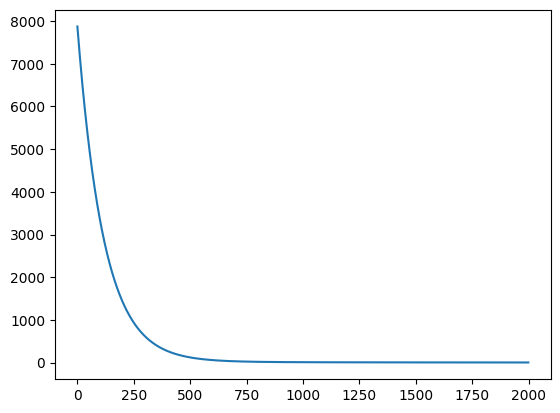

In [50]:
import matplotlib.pyplot as plt

train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网路
net = Network(13)
num_iterations = 2000
# 启动训练
points, losses = net.train(x, y, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

iter 9, loss 5.143394325795511
iter 19, loss 3.097924194225988
iter 29, loss 2.082241020617026
iter 39, loss 1.5673801618157397
iter 49, loss 1.296620473507743
iter 59, loss 1.1453399043319765
iter 69, loss 1.0530155717435201
iter 79, loss 0.9902292156463153
iter 89, loss 0.9426576903842502
iter 99, loss 0.9033048096880774
iter 109, loss 0.868732003041364
iter 119, loss 0.837229250968144
iter 129, loss 0.807927474161227
iter 139, loss 0.7803677341465796
iter 149, loss 0.7542920908532763
iter 159, loss 0.7295420168915829
iter 169, loss 0.7060090054240883
iter 179, loss 0.6836105084697766
iter 189, loss 0.6622781710179414
iter 199, loss 0.6419520361168637
iter 209, loss 0.6225776517869489
iter 219, loss 0.6041045903195837
iter 229, loss 0.5864856570315078
iter 239, loss 0.5696764374763879
iter 249, loss 0.5536350125932016
iter 259, loss 0.5383217588525027
iter 269, loss 0.5236991929680566
iter 279, loss 0.5097318413761649
iter 289, loss 0.4963861247069634
iter 299, loss 0.483630252343902

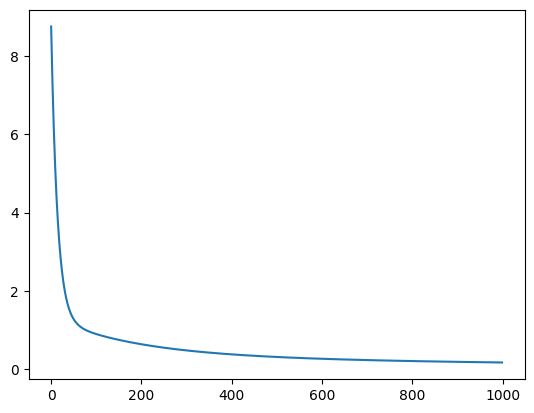

In [51]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z - y) * x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z -y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta=0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
    
    def train(self, x, y, iteration=100, eta=0.01):
        losses = []
        for i in range(iteration):
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w=gradient_w, gradient_b=gradient_b, eta=eta)
            losses.append(L)
            if (i + 1) % 10 == 0:
                print('iter {}, loss {}'.format(i, L))
        return losses

train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]
net = Network(13)
num_iterations = 1000
losses = net.train(x, y, iteration=num_iterations, eta=0.01)

plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

In [52]:
train_data, test_data = load_data()
train_data.shape

(404, 14)

In [53]:
train_data1 = train_data[0:10]
train_data1.shape

(10, 14)

In [54]:
net = Network(13)
x = train_data1[:, :-1]
y = train_data1[:, -1:]
loss = net.train(x, y, iteration=1, eta=0.01)
loss

[4.497480200683046]

Epoch   0 / iter   0, loss = 1.0281
Epoch   0 / iter   1, loss = 0.5048
Epoch   0 / iter   2, loss = 0.6382
Epoch   0 / iter   3, loss = 0.5168
Epoch   0 / iter   4, loss = 0.1951
Epoch   1 / iter   0, loss = 0.6281
Epoch   1 / iter   1, loss = 0.4611
Epoch   1 / iter   2, loss = 0.4520
Epoch   1 / iter   3, loss = 0.3961
Epoch   1 / iter   4, loss = 0.1381
Epoch   2 / iter   0, loss = 0.5642
Epoch   2 / iter   1, loss = 0.4250
Epoch   2 / iter   2, loss = 0.4480
Epoch   2 / iter   3, loss = 0.3881
Epoch   2 / iter   4, loss = 0.1884
Epoch   3 / iter   0, loss = 0.3921
Epoch   3 / iter   1, loss = 0.5582
Epoch   3 / iter   2, loss = 0.3759
Epoch   3 / iter   3, loss = 0.3849
Epoch   3 / iter   4, loss = 0.1425
Epoch   4 / iter   0, loss = 0.3821
Epoch   4 / iter   1, loss = 0.4382
Epoch   4 / iter   2, loss = 0.3864
Epoch   4 / iter   3, loss = 0.4314
Epoch   4 / iter   4, loss = 0.0471
Epoch   5 / iter   0, loss = 0.4264
Epoch   5 / iter   1, loss = 0.3829
Epoch   5 / iter   2, loss =

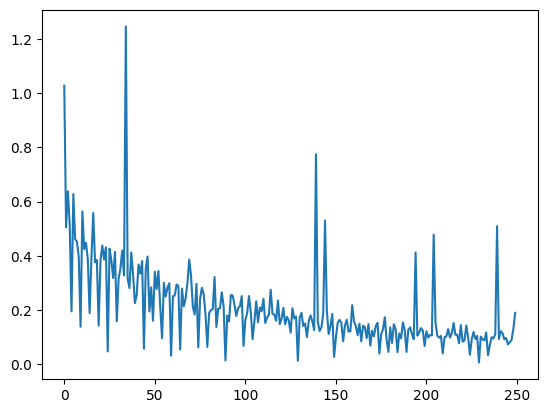

In [55]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                 format(epoch_id, iter_id, loss))
        
        return losses

# 获取数据
train_data, test_data = load_data()

# 创建网络
net = Network(13)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

3.7.1


AttributeError: type object 'Axes3D' has no attribute '__version__'

In [ ]:
def load_data():
    # 从文件导入数据
    datafile = './work/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)
    print(feature_num)
    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值
    maximums, minimums = training_data.max(axis=0), \
                            training_data.min(axis=0)

    # 对数据进行归一化处理
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [ ]:
training_data, test_data = load_data()
x = training_data[:, :-1]
y = training_data[:, -1:]

In [ ]:
# 查看数据
print(x[0])
print(y[0])